#  Salary_hike -> Build a prediction model for Salary_hike
 

In [1]:
# Salary_hike -> Build a prediction model for Salary_hik

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# #EDA and Data Visualization


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataset.columns# idenfity the features

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
len(dataset.columns) # identify the number of features

2

In [8]:
dataset.dtypes # identify the datatypes of the features

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
dataset.shape # identify the size of of the dataset

(30, 2)

In [10]:
dataset.isnull().values.any() # checking if dataset has empty cells

False

Text(0.5, 1.0, 'Joint plot using sns')

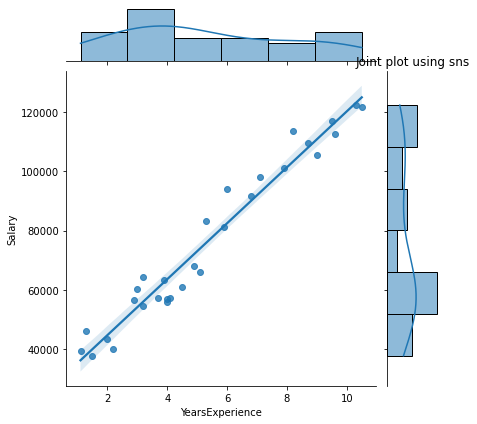

In [11]:
# Joint plot
sns.jointplot(x = "YearsExperience", y = "Salary", kind = "reg", data = dataset)
plt.title("Joint plot using sns")
# kind can be hex, kde, scatter, reg, hist. When kind='reg' it shows the best fit line.

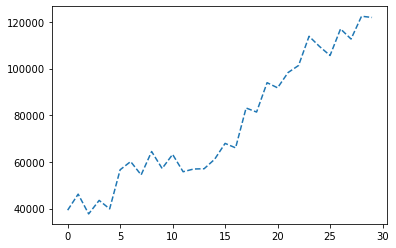

In [12]:
plt.plot(dataset.Salary,linestyle='dashed',)

C:\Users\chand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

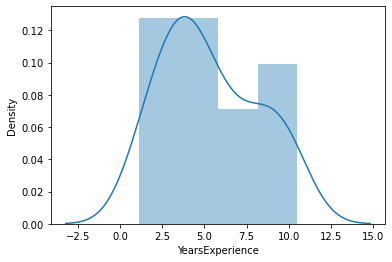

In [13]:
sns.distplot(dataset['YearsExperience'])


C:\Users\chand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

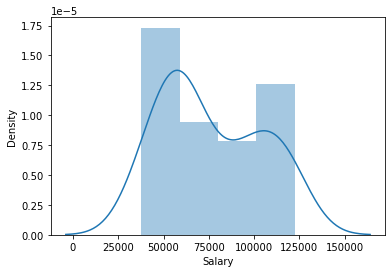

In [14]:
sns.distplot(dataset['Salary'])


<AxesSubplot:>

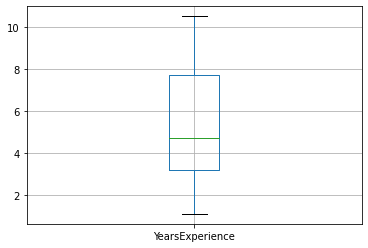

In [15]:
# Boxplot

dataset.boxplot(column= ['YearsExperience'])

<AxesSubplot:>

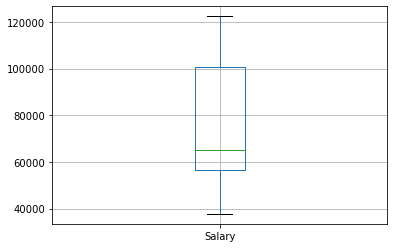

In [16]:
# Boxplot

dataset.boxplot(column= ['Salary'])

# coloumn renaiming 

In [17]:
dataset=dataset.rename({'YearsExperience':'Exp', 'Salary':'Sal'},axis=1)
dataset


,Exp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
dataset.corr()

,Exp,Sal
Exp,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:xlabel='Exp', ylabel='Sal'>

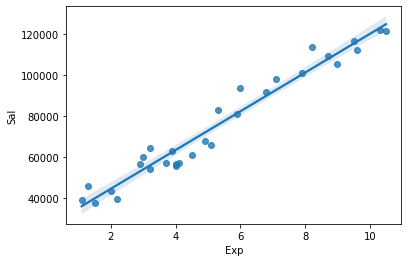

In [19]:
sns.regplot(x=dataset['Exp'],y=dataset['Sal'])


# Model building

In [22]:
import statsmodels.formula.api as smf

model = smf.ols("Sal~Exp",data=dataset).fit()

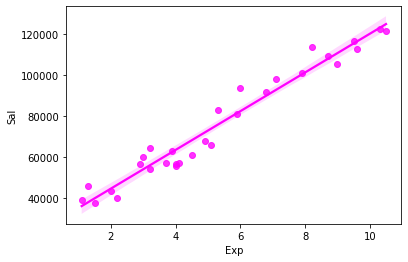

In [24]:
sns.regplot(x="Exp", y="Sal", data=dataset,color= 'magenta');

In [25]:
#Coefficients
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [26]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
Exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
Exp          1.143068e-20
dtype: float64


## Checking Accuracy of Model using r2

In [27]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

###   Model Prediction

In [28]:
#Model Prediction

In [29]:
Salary = 25792.200199 + 9449.962321*(8)  # lets years of experience as 8
Salary

101391.898767

In [30]:
# Manual prediction for say 5 years experince
Experience = (25792.200) + (9449.96)*(5)
Experience

73042.0

In [31]:
# Automatic Prediction

In [32]:
#Predict for 8,9,5,10 sorting_time
newdata=pd.Series([8,9,5,10])

In [35]:
data_pred=pd.DataFrame(newdata,columns=['Exp'])
data_pred


,Exp
0,8
1,9
2,5
3,10


In [36]:
model.predict(data_pred)


0    101391.898770
1    110841.861092
2     73042.011806
3    120291.823413
dtype: float64